# QUESTION 3. DESCRIPTIVE STATISTICS AND FACTORS THAT CONTRIBUTE TO CLIENT LOST

In [1]:
# import all libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
df_bank = pd.read_csv(r'C:\Users\carol\Documents\Data Mining\Answers.csv')

In [3]:
# Print the first few rows of the dataframe to confirm it's loaded correctly
print(df_bank.head())

   Row_Number  Customer_ID Last_Name  Credit Score Country  Gender  Age  \
0           1     15634602  Hargrave           619      FR  Female   42   
1           2     15647311      Hill           608      ES  Female   41   
2           3     15619304      Onio           502      FR  Female   42   
3           4     15701354      Boni           699      FR  Female   39   
4           5     15737888  Mitchell           850      ES  Female   43   

   Tenure       Balance  Products  HasCreditCard?  IsActiveMember  \
0       2        $0.00          1               1               1   
1       1   $83,807.86          1               0               1   
2       8  $159,660.80          3               1               0   
3       1        $0.00          2               0               0   
4       2  $125,510.82          1               1               1   

  Estimated Salary  ExitedBank?  
0      $101,348.88            1  
1      $112,542.58            0  
2      $113,931.57            1 

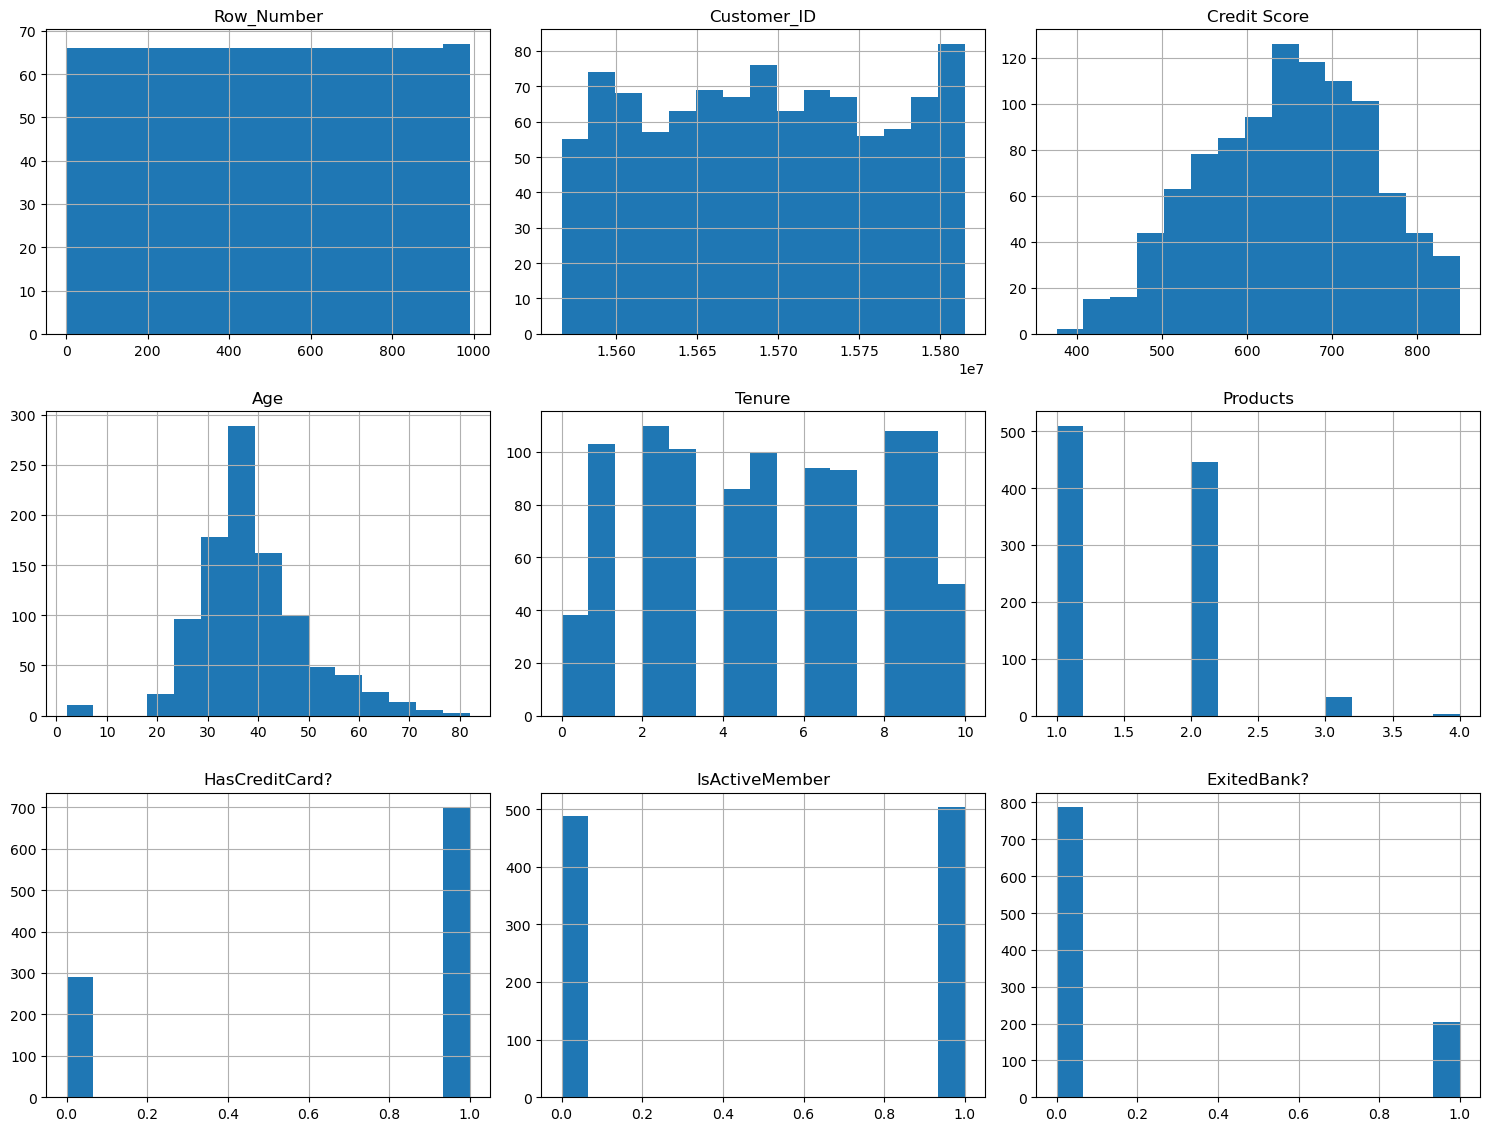

In [4]:
#Plot histograms for all numeric columns
df_bank.hist(bins=15, figsize=(15, 15), layout=(4, 3))  

# Adjusted to 4 rows and 3 columns\n",
plt.tight_layout()
plt.show()


In [5]:
# Review any missing values

df_bank.isnull().sum()

Row_Number          0
Customer_ID         0
Last_Name           1
Credit Score        0
Country             0
Gender              1
Age                 0
Tenure              0
Balance             0
Products            0
HasCreditCard?      0
IsActiveMember      0
Estimated Salary    0
ExitedBank?         0
dtype: int64

NOTE: Null values could  not be calculated or edited. However it isnot possible to remove them as the assigned information is important to the overall analysis. 

In [6]:
# REVIEW DATA TYPES
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Row_Number        991 non-null    int64 
 1   Customer_ID       991 non-null    int64 
 2   Last_Name         990 non-null    object
 3   Credit Score      991 non-null    int64 
 4   Country           991 non-null    object
 5   Gender            990 non-null    object
 6   Age               991 non-null    int64 
 7   Tenure            991 non-null    int64 
 8   Balance           991 non-null    object
 9   Products          991 non-null    int64 
 10  HasCreditCard?    991 non-null    int64 
 11  IsActiveMember    991 non-null    int64 
 12  Estimated Salary  991 non-null    object
 13  ExitedBank?       991 non-null    int64 
dtypes: int64(9), object(5)
memory usage: 108.5+ KB


NOTE: Gender 990 count is due to a Null value. Not edited as there is no reference to take into account. 
Other corrective actions were taken and detailed on additional documentation. 

In [7]:
# Convert 'Row_Number' and 'Customer_ID' columns to string type: 

df_bank[['Row_Number', 'Customer_ID']] = df_bank[['Row_Number', 'Customer_ID']].astype(str)

In [8]:
#Checking data: 

df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Row_Number        991 non-null    object
 1   Customer_ID       991 non-null    object
 2   Last_Name         990 non-null    object
 3   Credit Score      991 non-null    int64 
 4   Country           991 non-null    object
 5   Gender            990 non-null    object
 6   Age               991 non-null    int64 
 7   Tenure            991 non-null    int64 
 8   Balance           991 non-null    object
 9   Products          991 non-null    int64 
 10  HasCreditCard?    991 non-null    int64 
 11  IsActiveMember    991 non-null    int64 
 12  Estimated Salary  991 non-null    object
 13  ExitedBank?       991 non-null    int64 
dtypes: int64(7), object(7)
memory usage: 108.5+ KB


In [9]:
# Remove dollar signs and spaces, then convert to float both Balance and Estimated Salary

df_bank['Balance'] = df_bank['Balance'].str.replace('$', '').str.replace(',', '').astype(float)
df_bank['Estimated Salary'] = df_bank['Estimated Salary'].str.replace('$', '').str.replace(',', '').astype(float)


In [10]:
# DESCRIPTIVE ANALYSIS
df_bank.describe()

,Credit Score,Age,Tenure,Balance,Products,HasCreditCard?,IsActiveMember,Estimated Salary,ExitedBank?
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,648.522704,38.682139,5.066599,78002.718063,1.522704,0.706357,0.507568,98555.138496,0.205853
std,98.054640,10.953016,2.928371,62799.237345,0.573170,0.455660,0.500195,57179.549099,0.404527
min,376.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,371.050000,0.000000
25%,580.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,48642.435000,0.000000
50%,654.000000,37.000000,5.000000,98668.180000,1.000000,1.000000,1.000000,98368.240000,0.000000
75%,721.000000,44.000000,8.000000,129461.850000,2.000000,1.000000,1.000000,146236.190000,0.000000
max,850.000000,82.000000,10.000000,213146.200000,4.000000,1.000000,1.000000,199725.390000,1.000000


NOTE: Age shows some outliers with a min 2 years old. Clients tenure is measure between 0 to 10 years. Most clients will adquired at least 1 products with a maximum of 4. 50% of clients will have a credit card. 50% of client are considered active members. 

In [11]:
# Replace \"Age\" = 2 with the median age of the column

df_bank.loc[df_bank['Age'] == 2, 'Age'] = (df_bank['Age'].median())


In [12]:
# review Age new min 

df_bank.describe()

,Credit Score,Age,Tenure,Balance,Products,HasCreditCard?,IsActiveMember,Estimated Salary,ExitedBank?
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,648.522704,39.070636,5.066599,78002.718063,1.522704,0.706357,0.507568,98555.138496,0.205853
std,98.054640,10.241974,2.928371,62799.237345,0.573170,0.455660,0.500195,57179.549099,0.404527
min,376.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,371.050000,0.000000
25%,580.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,48642.435000,0.000000
50%,654.000000,37.000000,5.000000,98668.180000,1.000000,1.000000,1.000000,98368.240000,0.000000
75%,721.000000,44.000000,8.000000,129461.850000,2.000000,1.000000,1.000000,146236.190000,0.000000
max,850.000000,82.000000,10.000000,213146.200000,4.000000,1.000000,1.000000,199725.390000,1.000000


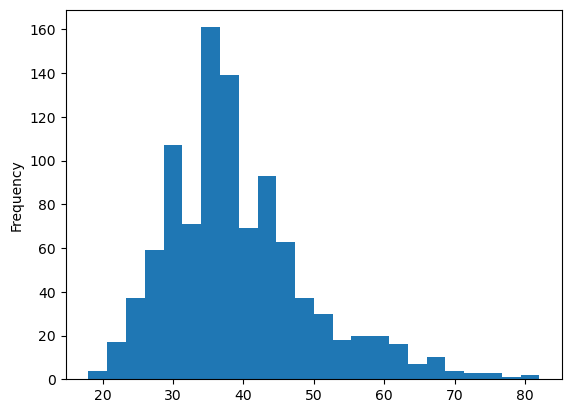

In [13]:
#Creating histogram on ages

hist=df_bank['Age'].plot.hist(bins=24)

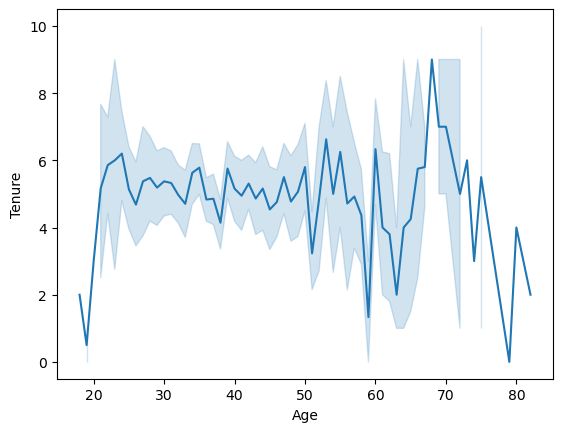

In [24]:
#Creating a line chart to analise the correlation between age ad tenure

line = sns.lineplot(data=df_bank,x='Age',y='Tenure')

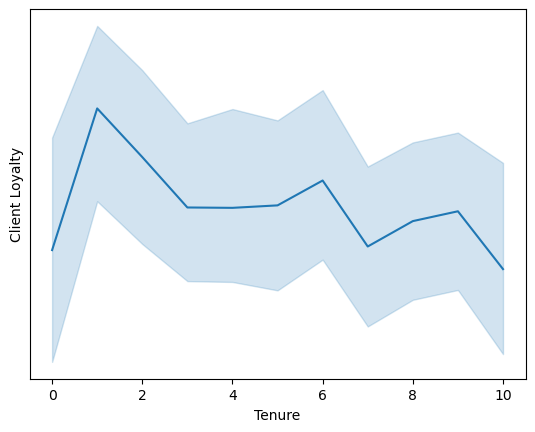

In [39]:
#Creating a line chart to analise the correlation between age ad tenure

line = sns.lineplot(data=df_bank,x='Tenure',y='Client Loyalty')

# QUESTION 3. IDENTIFY RISK FACTOR CONTRIBUTION TO CLIENTS EXITING THE BANK

In [14]:
#Editing the ExitedBank column with tags to analise banks loyalty client

results=[]

for value in df_bank ['ExitedBank?']:
    if value == 0:
        results.append('Loyal Clients')
    elif value == 1:
        results.append('Exited from Bank')


In [15]:
# Add the new column to the df_bank 

df_bank['Client Loyalty'] = results

In [16]:
#Checking data
df_bank['Client Loyalty'].value_counts(dropna=False)

Client Loyalty
Loyal Clients       787
Exited from Bank    204
Name: count, dtype: int64

In [17]:
# Performing statistics on Clients Loyalty related to Loyalty flag

df_bank.groupby('Client Loyalty').agg({'Credit Score' : ['mean', 'min', 'max']})

Credit Score          
                         mean  min  max
Client Loyalty                         
Exited from Bank   636.549020  376  850
Loyal Clients      651.626429  411  850

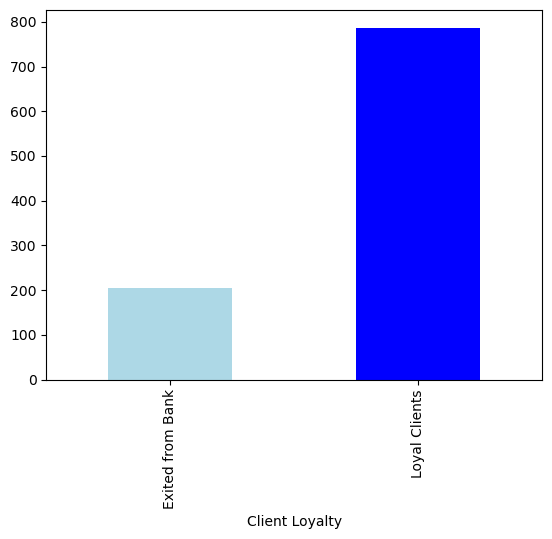

In [18]:
#Creating bar chart on the Client Loyalty

bar = df_bank['Client Loyalty'].value_counts().sort_index().plot.bar(color=['lightblue','blue','darkblue'])

In [19]:
# Separate clients who have left from those who have stayed

exit_bank = df_bank[df_bank['ExitedBank?'] == 1]
stayed_bank = df_bank[df_bank['ExitedBank?'] == 0]


In [20]:
#Checking the subset sum up the total correctly

len(exit_bank) + len(stayed_bank)

991

In [21]:
#Analysing the stayed_bank df
stayed_bank.shape

(787, 15)

In [28]:
# DESCRIPTIVE ANALYSIS ON STAYED_BANK DF

stayed_bank.describe()

,Credit Score,Age,Tenure,Balance,Products,HasCreditCard?,IsActiveMember,Estimated Salary,ExitedBank?
count,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.0
mean,651.626429,37.484117,5.157560,74830.867789,1.538755,0.706480,0.561626,98918.018437,0.0
std,97.467018,9.809285,2.926683,62819.020794,0.511407,0.455664,0.496503,56585.788520,0.0
min,411.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,371.050000,0.0
25%,583.000000,31.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51252.645000,0.0
50%,657.000000,36.000000,5.000000,93147.000000,2.000000,1.000000,1.000000,98301.610000,0.0
75%,722.500000,41.500000,8.000000,127817.875000,2.000000,1.000000,1.000000,145915.590000,0.0
max,850.000000,82.000000,10.000000,197041.800000,3.000000,1.000000,1.000000,199661.500000,0.0


In [27]:
# Check the value_counts function of categorical columns for clients who exit

print(stayed_bank['Country'].value_counts())
print(stayed_bank['Gender'].value_counts())

Country
FR    403
ES    202
DE    182
Name: count, dtype: int64
Gender
Male      445
Female    341
Name: count, dtype: int64


**NOTE:** Clients stayed within the bank remain an average of 5 years, with a Credit score of 657, average age of 36 years old,50% are active members, 2 products, an average balance 93K and a average Estimated salary 98K. 
787 clients stayed, Male clients are staying more than female (percentage of Male clients staying : 56.54% ( per country: DE 53%, ES 54% and 59% FR) 

In [23]:
# DESCRIPTIVE ANALYSIS ON EXIT_BANK DF

exit_bank.describe()

,Credit Score,Age,Tenure,Balance,Products,HasCreditCard?,IsActiveMember,Estimated Salary,ExitedBank?
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.0
mean,636.549020,45.191176,4.715686,90239.218873,1.460784,0.705882,0.299020,97155.204608,1.0
std,99.626853,9.570980,2.915484,61352.066625,0.764632,0.456766,0.458955,59537.153259,0.0
min,376.000000,22.000000,0.000000,0.000000,1.000000,0.000000,0.000000,417.410000,1.0
25%,562.750000,39.000000,2.000000,0.000000,1.000000,0.000000,0.000000,44685.167500,1.0
50%,643.500000,45.000000,5.000000,112433.965000,1.000000,1.000000,0.000000,100375.400000,1.0
75%,714.250000,51.000000,7.000000,133713.527500,2.000000,1.000000,1.000000,148291.382500,1.0
max,850.000000,69.000000,10.000000,213146.200000,4.000000,1.000000,1.000000,199725.390000,1.0


In [26]:
# Check the value_counts function of categorical columns for clients who left\n",
print(exit_bank['Country'].value_counts())
print(exit_bank['Gender'].value_counts())

Country
FR    77
DE    75
ES    52
Name: count, dtype: int64
Gender
Female    121
Male       83
Name: count, dtype: int64


**NOTE** : Clients that left the bank has only 1 product, Average age 45 years old, average balance 112K, only 25% are active members, average estimated salary 100K.
204 clients left. 59.3% of clients leaving are Female (Percentages of female per country: 66% in FR, 60% in ES and 52% in DE)

**FACTORS THAT CONTRIBUTE TO CLIENT LOSS**
1. The longer a client stays the more likely it is to leave. ( correlation between tenure and Client loyalty)
2. Between 20 to 50 the tenure is stable around 6 years. After 50 to 60 fluctionations are abrupt, at 60 ther are important drops. However the tenure spikes are reflected around 70 years old.
3. Active members are more likely to remain as a client.
4. Clients with multiple products are more likely to remain as a loyal client.
5. Gender seems to be a factor when losing clients. Spotting Female clients exiting more(59.3%)
6. Countries such as FR (66%) and ES (60%) have more exiting clients percentages than DE 
7. The higher the balance the most likely to leave the bank
 
